> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB_Movies_Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [25]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [26]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
df.shape

(10866, 21)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [29]:
df.duplicated().sum()

1

In [30]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Dropping Columns from TMDB_Movies Dataset)

In [31]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','imdb_id','cast','homepage','director','director','tagline','keywords','overview','production_companies','budget_adj','revenue_adj'], axis = 1, inplace = True)

In [32]:
df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [33]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [34]:
df.dropna(inplace = True)

In [35]:
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [36]:
df.drop_duplicates(inplace = True)

In [37]:
df.duplicated().sum()

0

In [38]:
df.shape

(10842, 10)

In [39]:
# Display the dataset with non zero values
df_new_tmdb = df[(df != 0).all(1)]
df_new_tmdb.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [40]:
df_new_tmdb.to_csv('tmdb_new.csv', index = False)

In [41]:
df_new_tmdb.shape

(3854, 10)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Display the movies which has highest and lowest profit)

In [42]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#insert new column with label profit_earned with the numerical index 3
df_new_tmdb.insert(3, 'profit_earned', df['revenue'] - df['budget'])
df_new_tmdb.head(2)

,popularity,budget,revenue,profit_earned,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [43]:
#Movies with highest profit earned
higest_profit_movie = df_new_tmdb.groupby(['original_title'])['profit_earned'].max().nlargest(1)
higest_profit_movie

original_title
Avatar    2544505847
Name: profit_earned, dtype: int64

In [44]:
# Movies with lowest profit earned
lowest_profit_movie = df_new_tmdb.groupby(['original_title'])['profit_earned'].min().nsmallest(1)
lowest_profit_movie

original_title
The Warrior's Way   -413912431
Name: profit_earned, dtype: int64

### Research Question 2  (In which year movies earned highest and lowest profit)

In [22]:
#Display in which year movies earned highest profit
highest_profit_year = df_new_tmdb.groupby('release_year')['profit_earned'].sum().nlargest(1)
highest_profit_year

release_year
2015    19032145273
Name: profit_earned, dtype: int64

In [23]:
#Display in which year movies earned low profit
lowest_profit_year = df_new_tmdb.groupby('release_year')['profit_earned'].sum().nsmallest(1)
lowest_profit_year


release_year
1966    52468689
Name: profit_earned, dtype: int64

### Release Year vs Profit earned

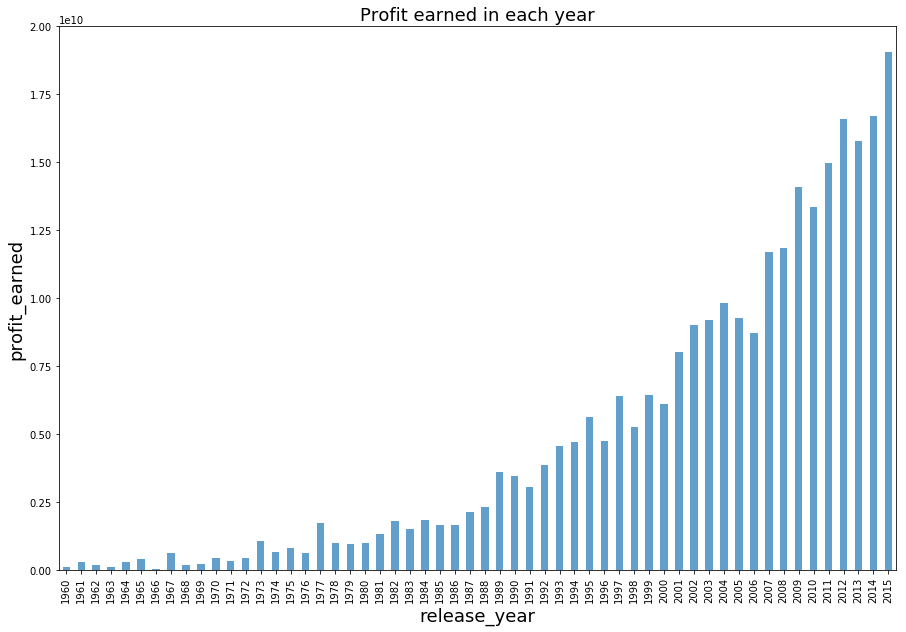

In [41]:
df_new_tmdb.groupby('release_year')['profit_earned'].sum().plot(kind = 'bar', figsize = (15, 10), alpha = .7)
plt.xlabel('release_year', fontsize = 18)
plt.ylabel('profit_earned', fontsize = 18)
plt.title('Profit earned in each year',fontsize = 18);


### Research Question 3 (Display the movies which has highest and lowest budget)

In [26]:
# Movie with higest budget
higest_budget_movie = df_new_tmdb.groupby(['original_title'])['budget'].max().nlargest(1)
higest_budget_movie

original_title
The Warrior's Way    425000000
Name: budget, dtype: int64

In [27]:
# Movie with lowest budget
lowest_budget_movie = df_new_tmdb.groupby(['original_title'])['budget'].min().nsmallest(1)
lowest_budget_movie

original_title
Lost & Found    1
Name: budget, dtype: int64

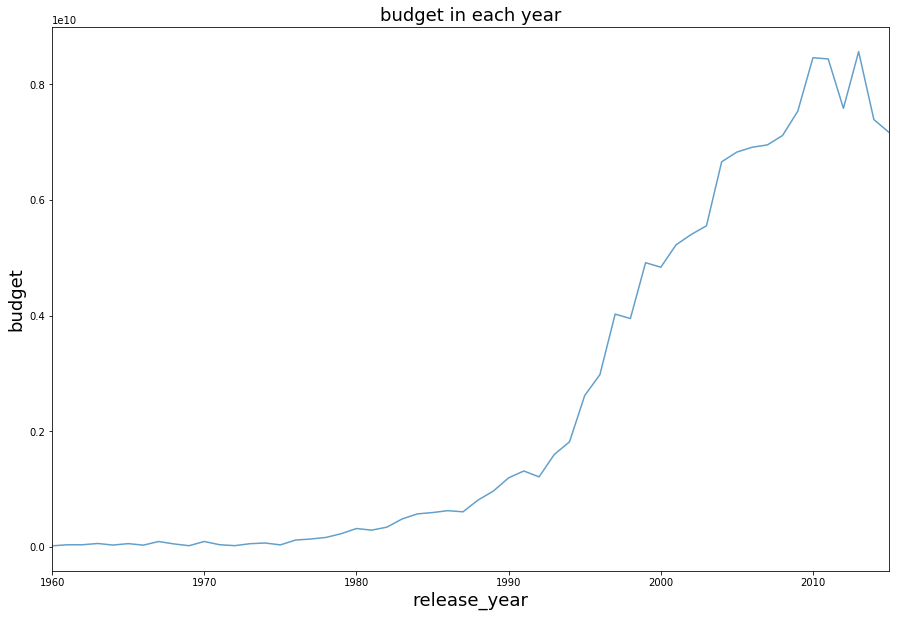

In [40]:
# Plot a graph to display the budget in each year
df_new_tmdb.groupby('release_year')['budget'].sum().plot(kind = 'line', figsize = (15, 10), alpha = .7)
plt.xlabel('release_year', fontsize = 18)
plt.ylabel('budget', fontsize = 18)
plt.title('budget in each year',fontsize = 18);


The above graph shows that the highest budget was in the year 2013 and the lowest budget was in the year 1960

In [29]:
# display in which year movies had highest budget
highest_budget_year = df_new_tmdb.groupby('release_year')['budget'].sum().nlargest(1)
highest_budget_year

release_year
2013    8567922778
Name: budget, dtype: int64

In [30]:
# Display in which year movies had low budget
lowest_budget_year = df_new_tmdb.groupby('release_year')['budget'].sum().nsmallest(1)
lowest_budget_year

release_year
1960    20806948
Name: budget, dtype: int64

### Research Question 4 (Display the highest and lowest revenue)

In [31]:
# Movie with highest revenue
higest_revenue_movie = df_new_tmdb.groupby(['original_title'])['revenue'].max().nlargest(1)
higest_revenue_movie

original_title
Avatar    2781505847
Name: revenue, dtype: int64

In [32]:
# Movie with lowest revenue
lowest_revenue_movie = df_new_tmdb.groupby(['original_title'])['revenue'].min().nsmallest(1)
lowest_revenue_movie

original_title
Mallrats    2
Name: revenue, dtype: int64

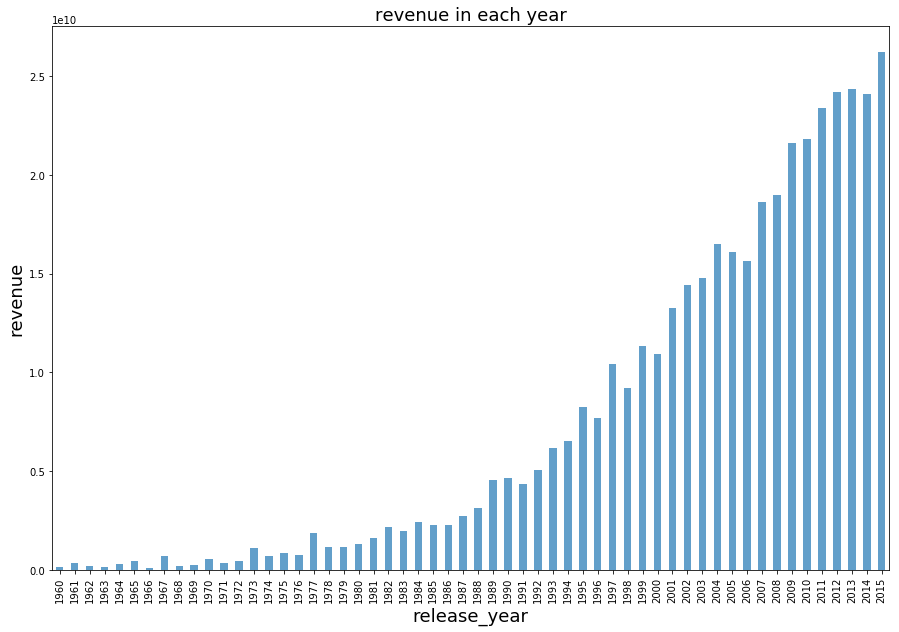

In [39]:
# Plot a graph to display the revenue in each year
df_new_tmdb.groupby('release_year')['revenue'].sum().plot(kind = 'bar', figsize = (15, 10), alpha = .7)
plt.xlabel('release_year', fontsize = 18)
plt.ylabel('revenue', fontsize = 18)
plt.title('revenue in each year',fontsize = 18);

The avove graph shows that the highest revenue was in the year 2015 and the lowest revenue was in the year 1966

### Research Question 5( Movies with longest and shortest runtime)

In [34]:
# Movies with longest runtime
long_runtime_movie = df_new_tmdb.groupby(['original_title'])['runtime'].max().nlargest(1)
long_runtime_movie

original_title
Carlos    338
Name: runtime, dtype: int64

In [35]:
# Movie with shortest runtime
short_runtime_movie = df_new_tmdb.groupby(['original_title'])['runtime'].min().nsmallest(1)
short_runtime_movie

original_title
Kid's Story    15
Name: runtime, dtype: int64

In [37]:
# view the min, 25%, 50%, 75%, max runtime values with pandas describe
df_new_tmdb['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

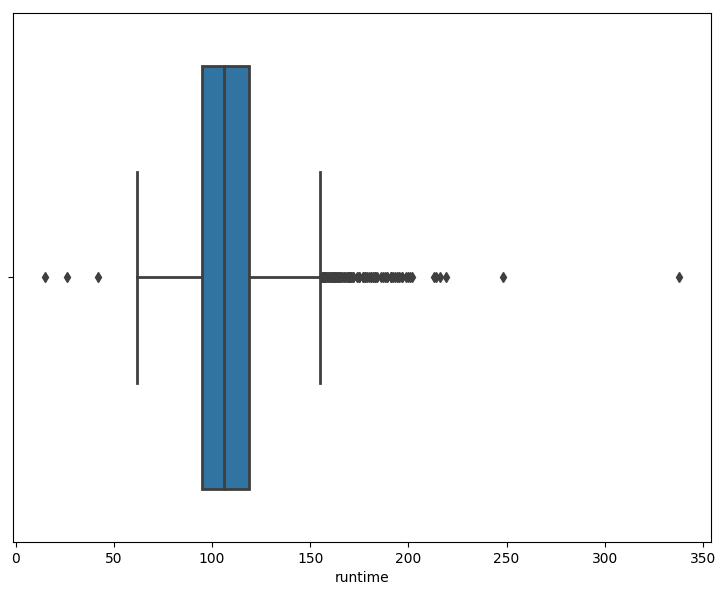

In [24]:
#using seaborn to display the boxplot
plt.figure(figsize=(9,7), dpi = 100)
sns.boxplot(df_new_tmdb['runtime'], linewidth = 2)
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])